In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/JayantGoel001/Heart-Disease-Classification/master/heart.csv"



# cargar el conjunto de datos
dataset = pd.read_csv(url)

# mostrar los primeros 10 registros del conjunto de datos
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

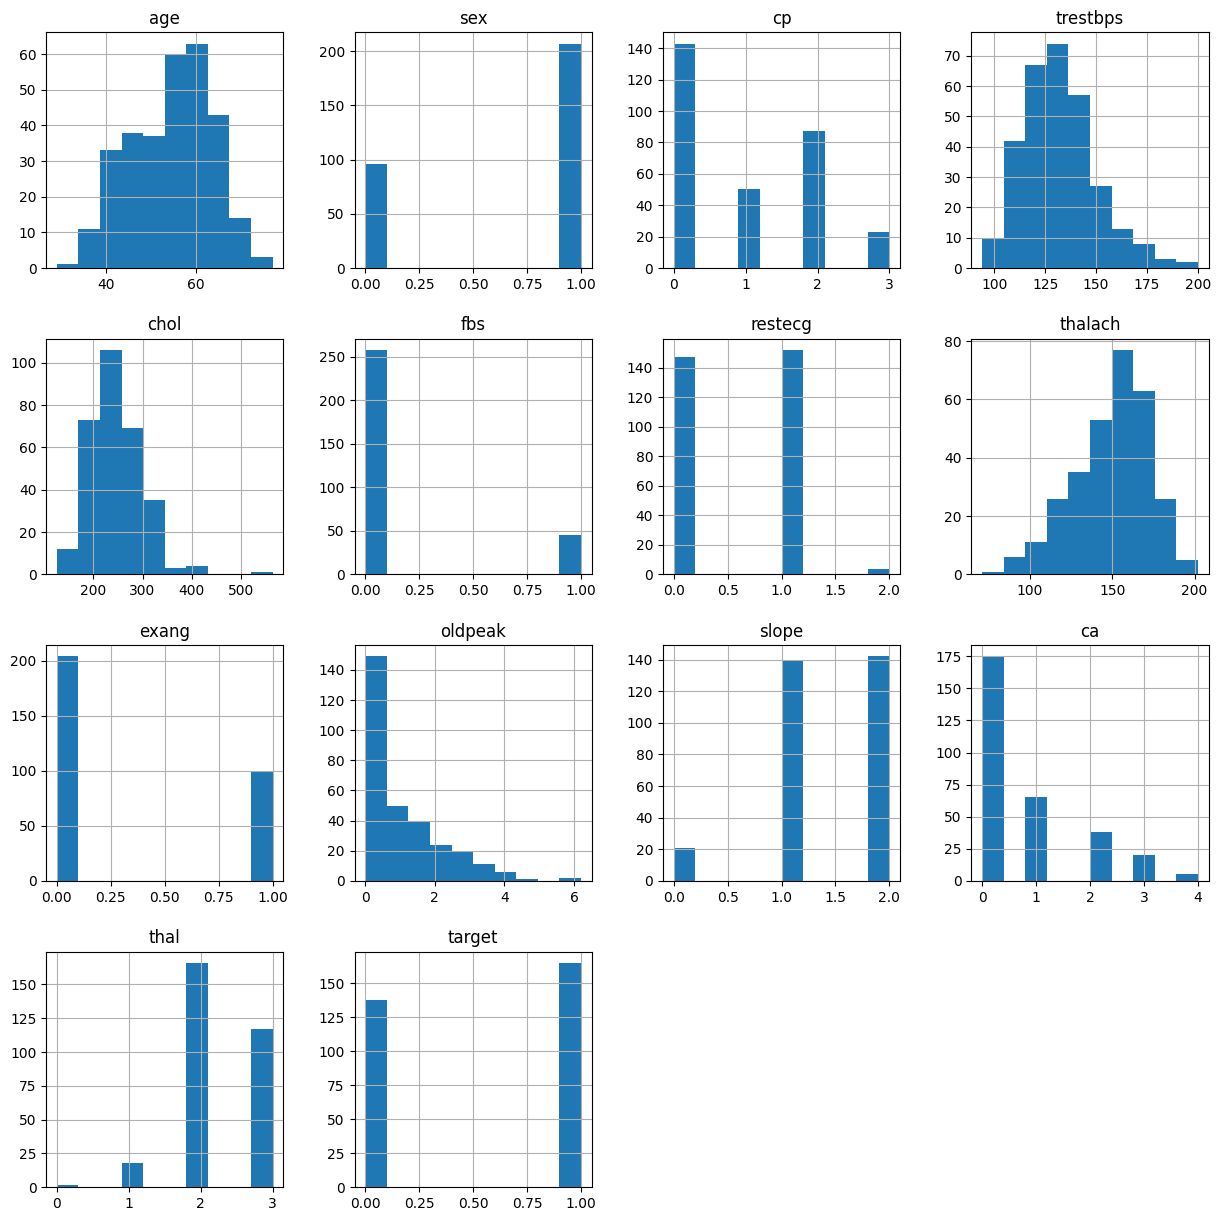

In [4]:
dataset.hist(figsize=(15,15))

Se debe normalizar por la diferentes escalas que hay en el data set

In [5]:
def normalizar(x, xmax, xmin, ymax, ymin):
  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b

  return y

In [6]:

max = np.max(dataset).values
min = np.min(dataset).values
data = normalizar(dataset,max,min,1,0)
data.head(5)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [7]:
# Split the data into features and labels
X = data.drop('target', axis=1)
y = data['target']

In [8]:
X.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667


In [9]:
y.head(4)

0    1.0
1    1.0
2    1.0
3    1.0
Name: target, dtype: float64

Seed

In [10]:
tf.random.set_seed(42)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

input_shape=(X_train.shape[1])
print(input_shape)

13


In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_dim=input_shape),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history=model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=100)


Epoch 1/200
3/3 [==============================] - 2s 461ms/step - loss: 0.6966 - accuracy: 0.4575 - val_loss: 0.7103 - val_accuracy: 0.4176
Epoch 2/200
3/3 [==============================] - 0s 30ms/step - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.7076 - val_accuracy: 0.4066
Epoch 3/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6855 - accuracy: 0.5189 - val_loss: 0.7060 - val_accuracy: 0.4396
Epoch 4/200
3/3 [==============================] - 0s 29ms/step - loss: 0.6806 - accuracy: 0.5660 - val_loss: 0.7058 - val_accuracy: 0.4396
Epoch 5/200
3/3 [==============================] - 0s 39ms/step - loss: 0.6763 - accuracy: 0.5519 - val_loss: 0.7062 - val_accuracy: 0.4286
Epoch 6/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6724 - accuracy: 0.5802 - val_loss: 0.7051 - val_accuracy: 0.4396
Epoch 7/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6682 - accuracy: 0.5849 - val_loss: 0.7025 - val_accuracy: 0.4615
Epoch 8/200
3/3 [==

Final loss:  0.3049534857273102


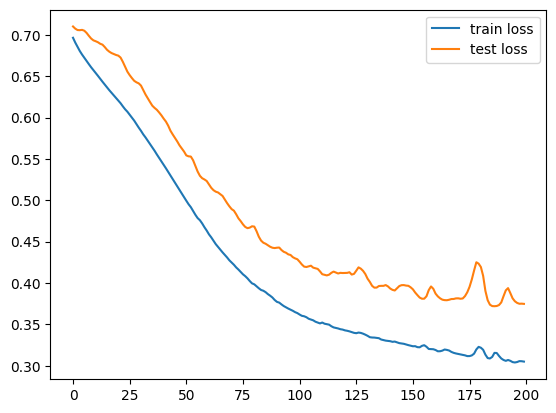

In [14]:
final_loss = history.history['loss'][-1]
print("Final loss: ", final_loss)

# Plot the loss and accuracy graphs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

Final Accuracy : 0.8773584961891174


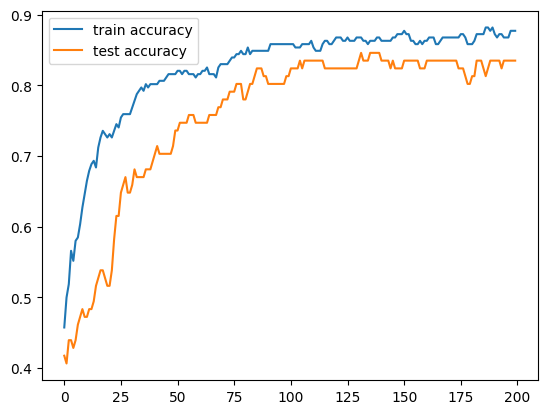

In [15]:
accuracy = history.history['accuracy'][-1]
print('Final Accuracy :', accuracy)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()

form 1 to make the matrix

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = model.predict(X_test)
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm

3/3 [==============================] - 0s 3ms/step


array([[37, 11],
       [ 4, 39]])

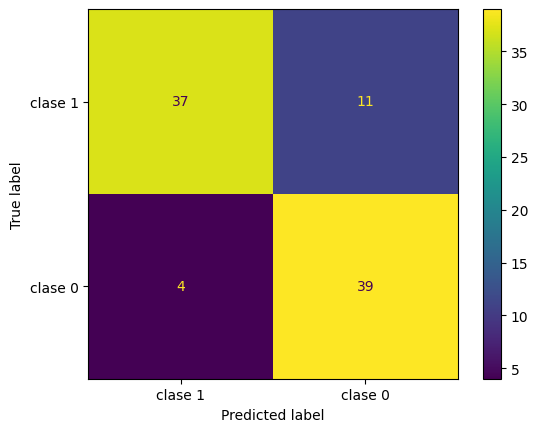

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['clase 1', 'clase 0'])
disp.plot()

form 2 to make the matrix

3/3 [==============================] - 0s 4ms/step
confusion matrix:
[[37 11]
 [ 4 39]]


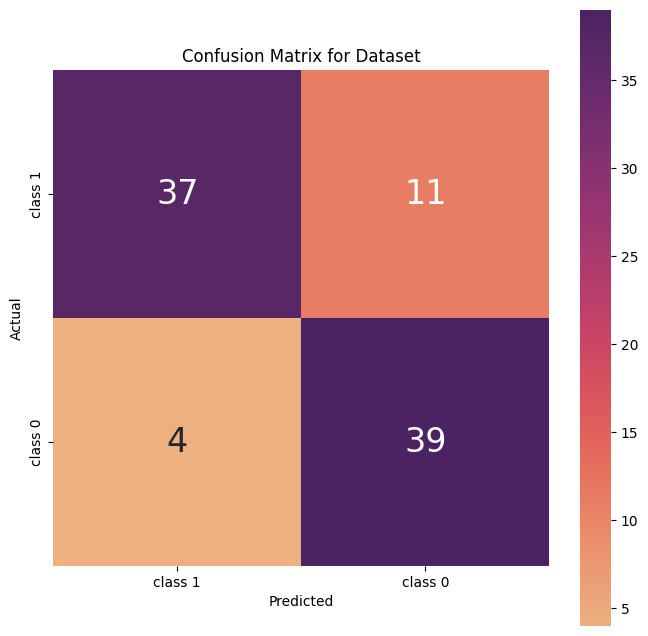

In [19]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)


# Print classifier
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:", cm, sep="\n")

# Draw confusion matrix using seaborn
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=['class 1', 'class 0'],
                 yticklabels=['class 1', 'class 0'],
                 fmt='g', cmap='flare', annot_kws={"size": 24})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix for Dataset')
plt.show()